## Pre-Requisites :
* Using ARIMA to predict sales Trend for the next 1 week basing on the seed data in our sales Table in the PostgreSQL database

* We used the amount and the date columns


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sqlalchemy import create_engine ,inspect
%matplotlib inline

In [2]:
def Connect_to_db():
    username = 'postgres'
    password = 'newpassword'      
    host = 'localhost'              
    port = '5432'                   
    database = 'pulsebi'
    engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')
    print("Connected to db")
    return engine

In [3]:
inspector = inspect(Connect_to_db())

Connected to db


In [5]:
TableList = inspector.get_table_names()

print(TableList)

['alembic_version', 'predictions', 'users', 'metrics', 'alerts', 'live_data', 'data_sources', 'customers', 'products', 'sales', 'features']


In [7]:
sales_table = pd.read_sql('SELECT * FROM sales',con=Connect_to_db())

Connected to db


In [8]:
sales_table

id  customerid  productid  quantity  amount        date     status
0   1           1          1         1  1200.0  2024-10-01  Completed
1   2           2          2         2  2200.0  2024-10-02  Completed
2   3           3          3         1  1500.0  2024-10-03    Pending
3   4           4          4         1  1300.0  2024-10-04  Completed
4   5           5          5         3   900.0  2024-10-05  Completed
5   6           6          6         2   640.0  2024-10-06    Pending
6   7           7          7         4   600.0  2024-10-07  Completed
7   8           8          8         2   400.0  2024-10-08  Completed
8   9           9          9         2   800.0  2024-10-09  Completed
9  10          10         10         1   500.0  2024-10-10  Completed

In [10]:
sales_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10 non-null     int64  
 1   customerid  10 non-null     int64  
 2   productid   10 non-null     int64  
 3   quantity    10 non-null     int64  
 4   amount      10 non-null     float64
 5   date        10 non-null     object 
 6   status      10 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 688.0+ bytes


## Feature Engineering

In [11]:
sales_table['date'] = pd.to_datetime(sales_table['date'])

In [12]:
salesDf = sales_table[['date','amount']]

In [13]:
salesDf.set_index('date', inplace=True)

In [15]:
print(salesDf)

            amount
date              
2024-10-01  1200.0
2024-10-02  2200.0
2024-10-03  1500.0
2024-10-04  1300.0
2024-10-05   900.0
2024-10-06   640.0
2024-10-07   600.0
2024-10-08   400.0
2024-10-09   800.0
2024-10-10   500.0


## Model Building

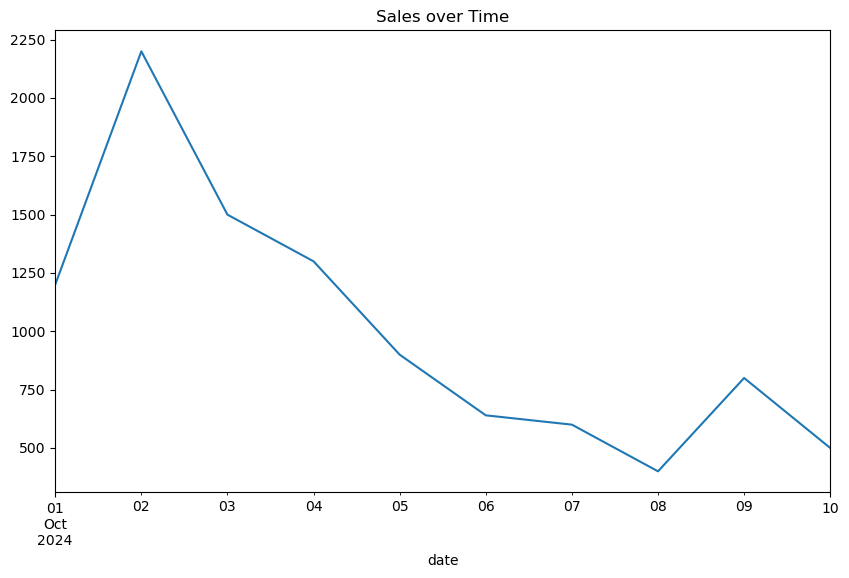

In [17]:
salesDf['amount'].plot(figsize=(10,6))
plt.title('Sales over Time')
plt.show()

In [22]:
model = ARIMA(salesDf['amount'], order=(2, 1, 0))
model_fit = model.fit()

C:\Users\Admin\anaconda3\envs\DeepLearning_Tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [30]:
salesDf['amount'].ndim

1

In [23]:
forecast = model_fit.forecast(steps=7)
print("Sales forecast for next 7 days:")
print(forecast)

Sales forecast for next 7 days:
2024-10-11    640.603527
2024-10-12    557.738360
2024-10-13    601.116533
2024-10-14    577.012399
2024-10-15    590.004178
2024-10-16    582.892642
2024-10-17    586.754871
Freq: D, Name: predicted_mean, dtype: float64


## Save the Model 

In [27]:
import joblib

In [28]:
joblib.dump(model_fit, 'Sales-Trend-Predictor-Model.pkl')


['Sales-Trend-Predictor-Model.pkl']